In [31]:
import numpy as np
import yfinance as yf
from scipy.stats import norm
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
start_date = datetime.datetime(2012, 1, 12)
end_date = datetime.datetime(2020, 8, 12)
stocks = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', '^GSPC']

## Download dos dados

In [3]:
data = {}

for stock in stocks:
    ticker = yf.download(stock, start_date, end_date)
    data[stock] = ticker['Close']
stock_price_df = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
stock_price_df

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,^GSPC
Date,,,,,,,,,
2012-01-12,15.049643,75.510002,30.120001,12.130000,175.929993,172.609940,5.650000,313.644379,1295.500000
2012-01-13,14.993214,74.599998,30.070000,12.350000,178.419998,171.281067,4.558000,311.328064,1289.089966
2012-01-17,15.167857,75.239998,30.250000,12.250000,181.660004,172.084137,5.320000,313.116364,1293.670044
2012-01-18,15.325357,75.059998,30.330000,12.730000,189.440002,173.107071,5.362000,315.273285,1308.040039
2012-01-19,15.276786,75.559998,30.420000,12.800000,194.449997,172.581268,5.352000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...
2020-08-05,110.062500,174.279999,29.850000,16.719999,3205.030029,119.933075,297.003998,1473.609985,3327.770020
2020-08-06,113.902496,172.199997,29.840000,18.459999,3225.000000,120.573616,297.915985,1500.099976,3349.159912
2020-08-07,111.112503,170.020004,30.020000,19.030001,3167.459961,119.464630,290.541992,1494.489990,3351.280029


In [5]:
data = {}

for stock in stocks:
    ticker = yf.download(stock, start_date, end_date)
    data[stock] = ticker['Volume']
stock_vol_df = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
stock_vol_df

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,^GSPC
Date,,,,,,,,,
2012-01-12,212587200,3934500,26511100,17891100,5385800,7197526,3646500,3764457,4019890000
2012-01-13,226021600,4641100,22096800,16621800,4753500,5522043,27502000,4631897,3692370000
2012-01-17,242897200,3700100,23500200,15480800,5644500,6279556,23258000,3832913,4010490000
2012-01-18,276791200,4189500,22015000,18387600,7473500,4812228,6301000,5544103,4096160000
2012-01-19,261738400,5397300,25524000,14022900,7096000,8961291,6231500,12657868,4465890000
...,...,...,...,...,...,...,...,...,...
2020-08-05,121776800,46189200,22951300,18857900,3916500,3786102,24739000,1979500,4732220000
2020-08-06,202428800,32921600,21908700,35867700,3940600,3574287,29961500,1995400,4267490000
2020-08-07,198045600,19318000,30422100,34572100,3936100,3818946,44482000,1577800,4104860000


In [7]:
stock_price_df.isnull().sum()

AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
^GSPC    0
dtype: int64

In [8]:
stock_price_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,^GSPC
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,35.204956,189.942700,35.162899,23.105743,915.665665,154.734984,51.920163,783.712512,2218.749554
std,17.706900,103.678586,3.207490,6.963847,697.838905,24.438017,42.197600,334.448057,537.321727
min,13.947500,67.239998,26.770000,7.140000,175.929993,90.602295,4.558000,278.481171,1278.040039
25%,22.291429,124.014999,33.040001,18.545000,316.490005,136.491402,36.918999,527.214417,1847.984985
50%,29.150000,142.419998,34.930000,23.780001,676.010010,150.047806,46.391998,737.599976,2106.629883
75%,43.754999,297.044998,37.419998,28.430000,1593.645020,177.796364,61.469999,1079.744995,2705.810059
max,113.902496,440.619995,43.470001,38.029999,3225.000000,206.309753,328.600006,1568.489990,3386.149902


## Normalização dos dados

In [9]:
norm_price = {}
for stock in stocks:
    norm_price[stock] = stock_price_df[stock] / stock_price_df[stock][0]

norm_price = pd.DataFrame(norm_price)

In [10]:
norm_vol = {}
for stock in stocks:
    norm_vol[stock] = stock_vol_df[stock] / stock_vol_df[stock][0]

norm_vol = pd.DataFrame(norm_vol)

<AxesSubplot:xlabel='Date'>

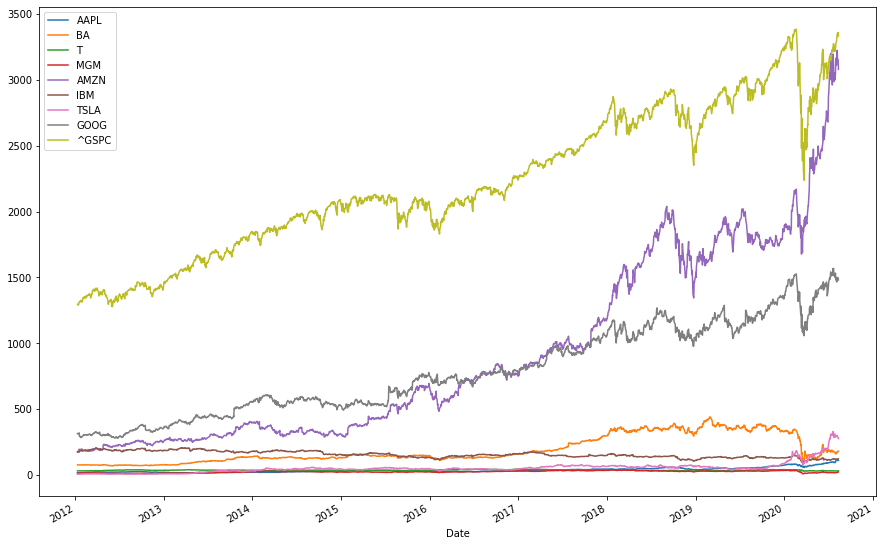

In [11]:
stock_price_df.plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

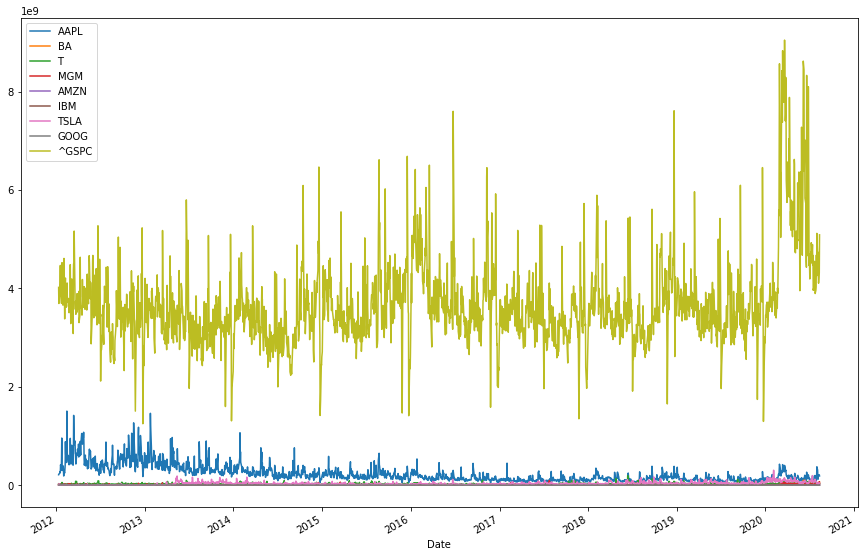

In [12]:
stock_vol_df.plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

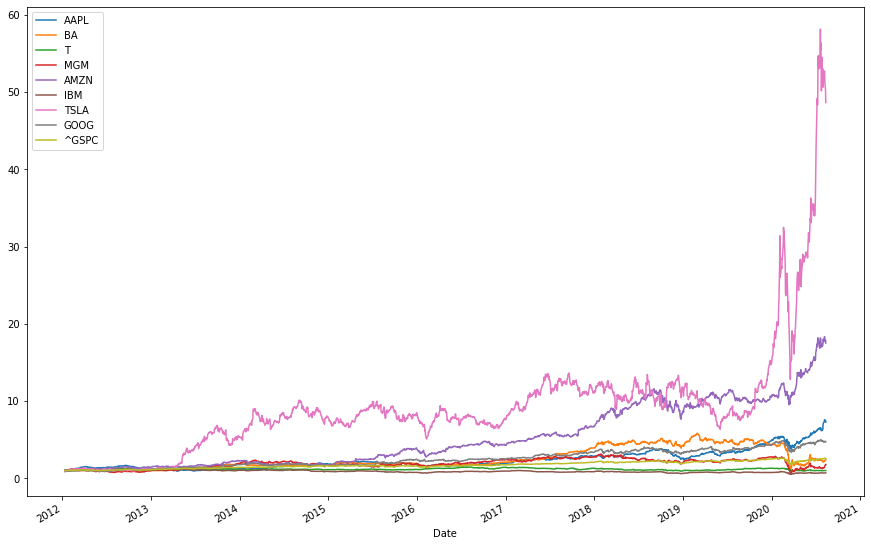

In [13]:
norm_price.plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

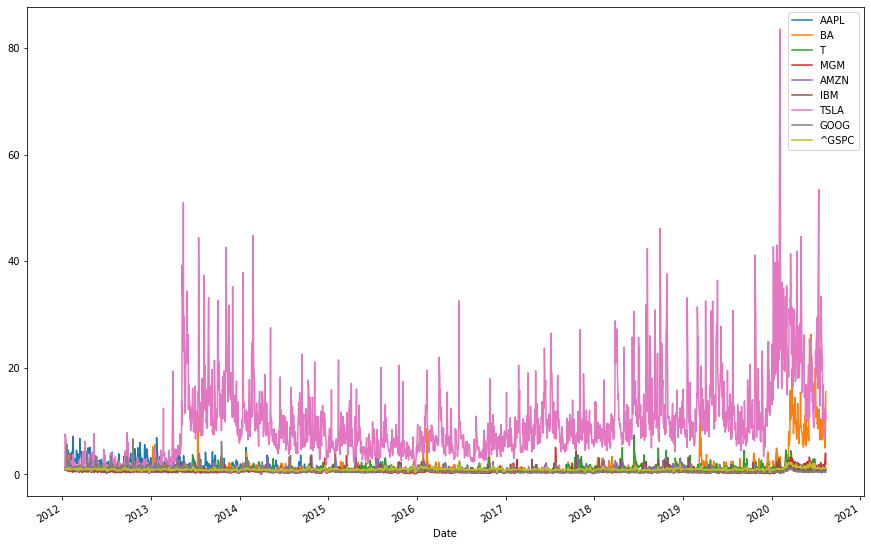

In [14]:
norm_vol.plot(figsize=(15,10))

In [15]:
# renomeando as colunas
stock_price_df = stock_price_df.rename(columns={'^GSPC': 'sp500'})
stock_vol_df = stock_vol_df.rename(columns={'^GSPC': 'sp500'})

## Concatenar os dados e criar o target (y)

In [16]:
# concatenando o close e o volume do ativo
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Close':price_df[name], 'Volume':vol_df[name]})

In [17]:
# função que cria a saída do modelo de ML 
# objetivo e predizer o valor do ativo no futuro 
# o valor do ativo hoje será o seu valor no futuro 

def trading_window(data):
    n = 1 # day
    data['Target'] = data[['Close']].shift(-n) # preço do ativo amanhã
    return data

In [18]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_target_df = trading_window(price_volume_df)

# remover a última coluna, já que será um valor nulo
price_volume_target_df = price_volume_target_df[:-1]

price_volume_target_df

,Close,Volume,Target
Date,,,
2012-01-12,1295.500000,4019890000,1289.089966
2012-01-13,1289.089966,3692370000,1293.670044
2012-01-17,1293.670044,4010490000,1308.040039
2012-01-18,1308.040039,4096160000,1314.500000
2012-01-19,1314.500000,4465890000,1315.380005
...,...,...,...
2020-08-04,3306.510010,4621670000,3327.770020
2020-08-05,3327.770020,4732220000,3349.159912
2020-08-06,3349.159912,4267490000,3351.280029


## Escalonando os dados entre 0 e 1

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df)

price_volume_target_scaled_df = pd.DataFrame(price_volume_target_scaled_df, columns = ['close', 'volume', 'target'], index = price_volume_target_df.index)

## Separação em treino e teste

In [20]:
X = price_volume_target_scaled_df[['close','volume']]
y = price_volume_target_scaled_df[['target']]

In [21]:
# Pelo fato de ser tine series, precisamos usar shuffle=False para que os dados não fiquem aleatórios
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

## Plotando os dados

<AxesSubplot:xlabel='Date'>

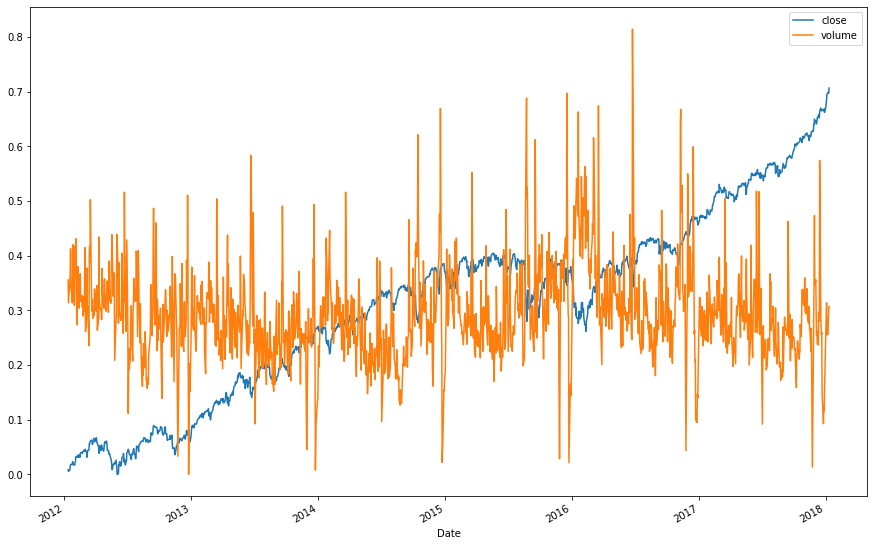

In [22]:
X_train.plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

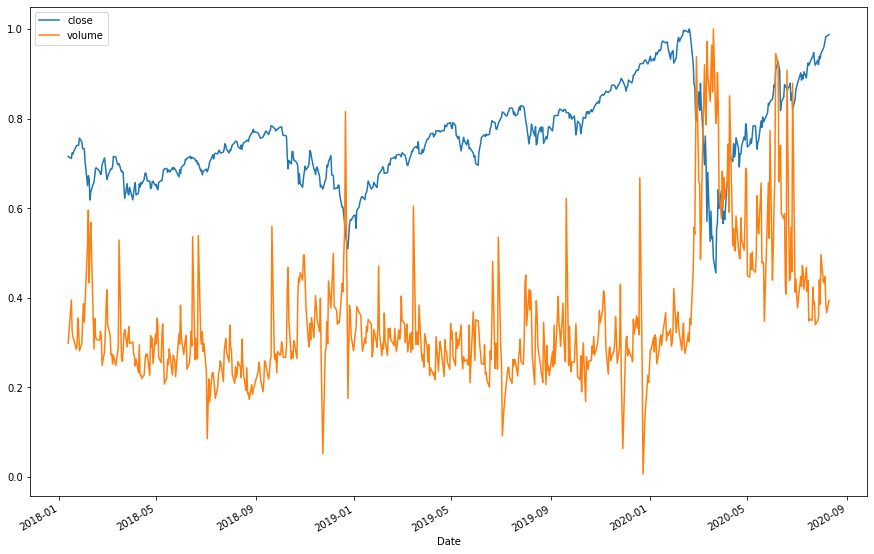

In [23]:
X_test.plot(figsize=(15,10))

## Ridge linear regression model

In [24]:
# Ridge regression = performs linear least squares with L2 regularization
# Create and train the ridge linear regression model

from sklearn.linear_model import Ridge

regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [25]:
# Test the model and calculate its accuracy
lr_accuracy = regression_model.score(X_test, y_test)
print('Ridge Regression Score: ', lr_accuracy)

Ridge Regression Score:  0.9490034666632502


In [38]:
reg_prediction = regression_model.predict(X_test)
metrics.r2_score(reg_prediction, y_test)

0.9461928602555508

In [26]:
# Make Prediction
predicted_prices = regression_model.predict(X)

In [27]:
df_predicted = pd.DataFrame()
df_predicted['close'] = price_volume_target_scaled_df['close']
df_predicted['predicted'] = predicted_prices

<AxesSubplot:xlabel='Date'>

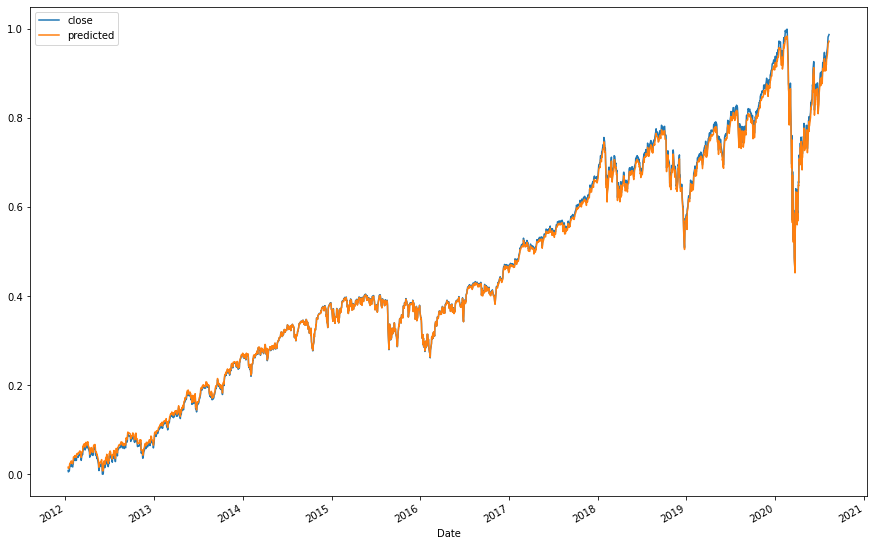

In [28]:
# Plot the results
df_predicted.plot(figsize=(15,10))

In [39]:
# regressão linear
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

lm_prediction = lm.predict(X_test)
metrics.r2_score(lm_prediction, y_test)

0.9591988472008421

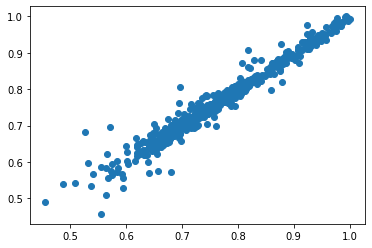

In [42]:
plt.scatter(y_test, lm_prediction)

In [40]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)

rforest_prediction = rforest.predict(X_test)
metrics.r2_score(rforest_prediction, y_test)

/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_4686/1826094637.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)


-8.269883256724603

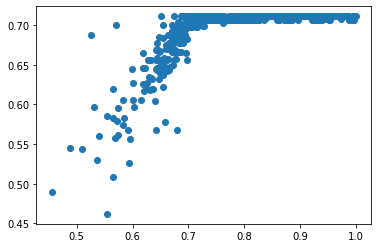

In [43]:
plt.scatter(y_test, rforest_prediction)

In [41]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

svr_prediction = svr.predict(X_test)

/home/andressa/PycharmProjects/geral/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
metrics.r2_score(svr_prediction, y_test)

-11.427557721309412